# Neural Networks Learning
In this exercise, we implement the backpropagation algorithm for neural
networks and apply it to the task of handwritten digit recognition.

##  Visualizing the data
There are 5000 training examples in `ex3data1.mat`, where each training example is a 20 pixel by 20 pixel grayscale image of a digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is "unrolled" into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix $ X $. This gives us a $ 5000 \times 400 $ matrix $ X $ where every row is a training example for a handwritten digit image.

$$
X = \begin{bmatrix}
-(x^{(1)})^T- \\
-(x^{(2)})^T- \\
\vdots \\
-(x^{(m)})^T-
\end{bmatrix}
$$

The second part of the training set is a 5000-dimensional vector $ y $ that contains labels for the training set. In this dataset, the digit zero was mapped to the value 10 in order to make things more compatible with Octave/MATLAB indexing. We load the data and display it on a 2-dimensional plot by calling the function displayData.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')

In [2]:
data1 = scipy.io.loadmat('ex3data1.mat')
X1 = data1['X']
y1 = data1['y']
#y1[y1==10] = 0  # Change mapping of zero digit to 0
y1=y1.T[0]      # Convert vertical vector to horizontal array
X1.shape, y1.shape

((5000, 400), (5000,))

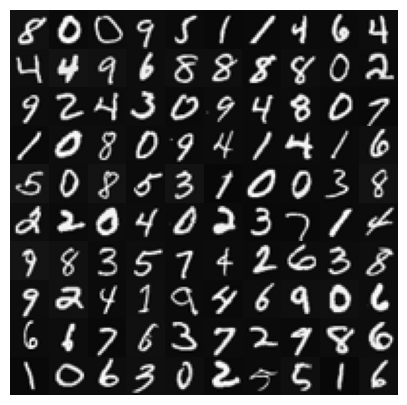

array([[ 8, 10, 10,  9,  5,  1,  1,  4,  6,  4],
       [ 4,  4,  9,  6,  8,  8,  8,  8, 10,  2],
       [ 9,  2,  4,  3, 10,  9,  4,  8, 10,  7],
       [ 1, 10,  8, 10,  9,  4,  1,  4,  1,  6],
       [ 5, 10,  8,  5,  3,  1, 10, 10,  3,  8],
       [ 2,  2, 10,  4, 10,  2,  3,  7,  1,  4],
       [ 9,  8,  3,  5,  7,  4,  2,  6,  3,  8],
       [ 9,  2,  4,  1,  9,  4,  6,  9, 10,  6],
       [ 6,  6,  7,  6,  3,  7,  2,  9,  8,  6],
       [ 1, 10,  6,  3, 10,  2,  5,  5,  1,  6]], dtype=uint8)

In [6]:
def displayData(X, y, plot_size=10, fig_size=5):
    indices = np.random.choice(len(X), plot_size*plot_size, replace=False)
    labels = y[indices]
    selected_images = X[indices]
    fig, axes = plt.subplots(plot_size, plot_size, figsize=(fig_size, fig_size))
    for i, ax in enumerate(axes.flat):
        rotated_image = np.rot90(np.fliplr((selected_images[i].reshape(20, 20))))
        ax.imshow(rotated_image.reshape(20, 20), cmap='gray')
        ax.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    return labels.reshape(plot_size, plot_size)

displayData(X1, y1)

## Model representation
This neural network has 3 layers – an input layer, a hidden layer and an output layer. 
Recall that our inputs are pixel values of digit images. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). 

We have been provided with a set of network parameters (Θ(1) ,Θ(2))
already trained by us. These are stored in `ex3weights.mat` and will be
loaded into `Theta1` and `Theta2`.
 
The parameters have dimensions that are sized for a neural network with 25 units in the second 
layer and 10 output units (corresponding to the 10 digit classes).

In [7]:
weights = scipy.io.loadmat('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
Theta1.shape, Theta2.shape

((25, 401), (10, 26))